In [8]:
import numpy as np
import pandas as pd
import os
from PIL import Image
import cv2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix
from tqdm import tqdm
import joblib

tqdm.pandas()

In [2]:
def sum_of_pixel(file_path):
    img = np.array(Image.open(file_path).convert('L'))
    return np.sum(img) / (img.shape[0] * img.shape[1])

In [13]:
if os.path.exists('yanport_dataset/df.csv'):
    df = pd.read_csv('yanport_dataset/df.csv')
else :
    df = pd.DataFrame(columns=['image_path', 'path_ela', 'label'])

    folder_path = 'yanport_dataset/REAL'
    real_df = pd.DataFrame(columns=['image_path', 'path_ela', 'label'])
    for filename in os.listdir(folder_path):
        if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.jpeg'):
            file_path = os.path.join(folder_path, filename)
            row = {'image_path': file_path, 'path_ela': 'yanport_dataset/ELA_REAL/' + filename, 'label': 0}
            real_df = pd.concat([real_df, pd.DataFrame(row, index=[0])], ignore_index=True)

    fake_df = pd.DataFrame(columns=['image_path', 'path_ela', 'label'])
    folder_path = 'yanport_dataset/FAKE'
    for filename in os.listdir(folder_path):
        if filename.endswith('.jpg') or filename.endswith('.png') or filename.endswith('.jpeg'):
            file_path = os.path.join(folder_path, filename)
            row = {'image_path': file_path, 'path_ela': 'yanport_dataset/ELA_FAKE/' + filename, 'label': 1}
            fake_df = pd.concat([fake_df, pd.DataFrame(row, index=[0])], ignore_index=True)

    df = pd.concat([real_df, fake_df], ignore_index=True)
    df.to_csv('yanport_dataset/df.csv', index=False)

In [14]:
df['sum_of_pixel'] = df['path_ela'].progress_apply(sum_of_pixel)

100%|██████████| 2746/2746 [00:03<00:00, 708.38it/s]


In [5]:
df[['label', 'sum_of_pixel']].groupby('label').describe()

sum_of_pixel                                                    \
             count      mean       std       min       25%       50%   
label                                                                  
0           1423.0  0.096742  0.117291  0.000123  0.023931  0.056712   
1           1323.0  0.545049  0.347588  0.004158  0.266090  0.495490   

                           
            75%       max  
label                      
0      0.126139  0.977672  
1      0.781530  1.998125

In [6]:
df['label'] = df['label'].astype(int)

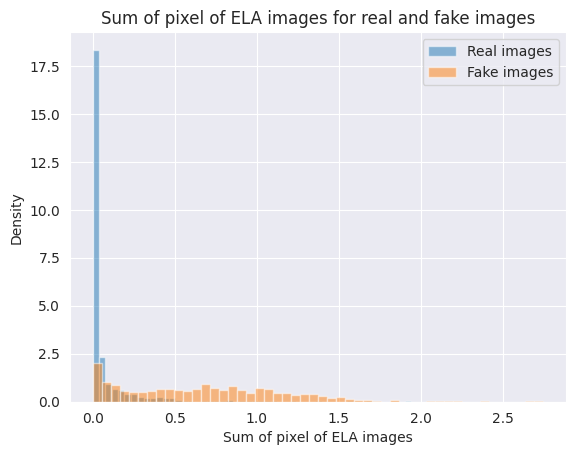

In [6]:
# plot histogram of sum_of_pixel for real and fake images
import matplotlib.pyplot as plt

real = df[df['label'] == 0]
fake = df[df['label'] == 1]

plt.hist(real['sum_of_pixel'], bins=50, alpha=0.5, label='Real images', density=True)
plt.hist(fake['sum_of_pixel'], bins=50, alpha=0.5, label='Fake images', density=True)
plt.legend(loc='upper right')
plt.xlabel('Sum of pixel of ELA images')
plt.ylabel('Density')
plt.title('Sum of pixel of ELA images for real and fake images')
plt.savefig('sum_of_pixel.png')
plt.show()

In [7]:
X = df['sum_of_pixel']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
if os.path.exists('model_1.pkl'):
    svc = joblib.load('model_1.pkl')
else:
    svc = SVC()
    svc.fit(X_train.values.reshape(-1, 1), y_train)
    joblib.dump(svc, 'model_1.pkl')
    
y_pred = svc.predict(X_test.values.reshape(-1, 1))
print('SVC')
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('F1:', f1_score(y_test, y_pred))

SVC
Accuracy: 0.8418181818181818
Recall: 0.7854406130268199
Precision: 0.8686440677966102
F1: 0.8249496981891348
